# Problem Statement

Customer Segmentation Analysis

Customer segmentation is the problem of uncovering information about a firm's customer base, based on the interaction with the 
business. In most cases this interaction is in terms of their purchases bahaviour and pattern. We explore some of the ways in 
which this can be used.

You own the mall and want to understand the customers like who can easily converge[Target Customer] so that the sense can be 
given to marketing team and plan the stratergy accordingly.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(2030, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2030 non-null   int64 
 1   Gender                  2030 non-null   object
 2   Age                     2030 non-null   int64 
 3   Annual Income (k$)      2030 non-null   int64 
 4   Spending Score (1-100)  2030 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 79.4+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,2030.000000,2030.000000,2030.000000,2030.000000
mean,1015.500000,51.031034,67.196552,52.007389
std,586.154843,16.600591,31.330309,26.501949
min,1.000000,12.000000,15.000000,1.000000
25%,508.250000,38.000000,42.000000,34.000000
50%,1015.500000,53.000000,67.000000,54.000000
75%,1522.750000,65.000000,88.000000,74.000000
max,2030.000000,98.000000,137.000000,100.000000


# Exploratory Data Analysis

In [9]:
males_age = data[data['Gender']=='Male']['Age'] #Subset with males age
females_age = data[data['Gender']=='Female']['Age'] #Subset with females age

In [10]:
age_bins = range(10,100,5)

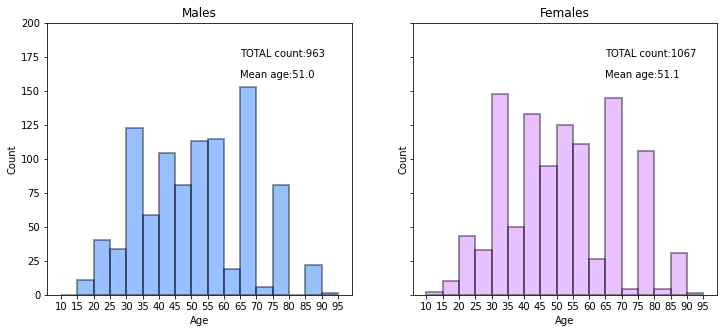

In [11]:
# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=200)
ax1.set_title('Males')
ax1.set_ylabel("Count")
ax1.text(65,175,'TOTAL count:{}'.format(males_age.count()))
ax1.text(65,160,'Mean age:{:.1f}'.format(males_age.mean()))

#Females Histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel("Count")
ax2.text(65,175,'TOTAL count:{}'.format(females_age.count()))
ax2.text(65,160,'Mean age:{:.1f}'.format(females_age.mean()))

plt.show()

# Kolmogorov-Smirnov Test

In [12]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test for males and females age distributions
ks_statistic, p_value = ks_2samp(males_age, females_age)

print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Kolmogorov-Smirnov Test:
KS Statistic: 0.02815027624739543
P-value: 0.8026315887865405
Fail to reject the null hypothesis: There is no significant difference between the distributions.


Since p-value is greater than level of significance whuch is 0.05 we fail to reject null hypothesis. Therefore, we conclude that there is no significant difference between the distribution of males and females 

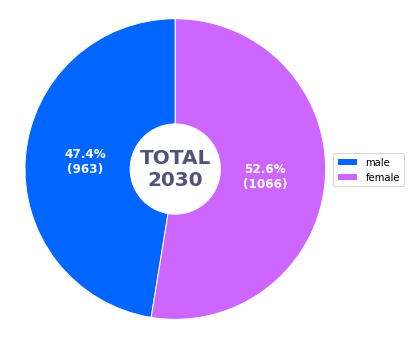

In [13]:
def labeler(pct, allvals):
    absolute =  int(pct/100 * np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()]

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                  autopct=lambda pct : labeler(pct, sizes),
                                  radius=1,
                                  colors=['#0066ff','#cc66ff'],
                                  startangle=90,
                                  textprops=dict(color='w'),
                                  wedgeprops=dict(width=0.7,edgecolor='w'))

ax1.legend(wedges, ['male','female'],
          loc = 'center right',
          bbox_to_anchor=(0.7, 0, 0.5,1))

plt.text(0,0, "TOTAL\n{}".format(data['Age'].count()),
        weight='bold',size=20,color='#52527a',
        ha='center',va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal') #Equal ascept ratio
plt.show()


There are slightly more female customer than male ones (1067 vs 957) Females are 52.7 % of total customers

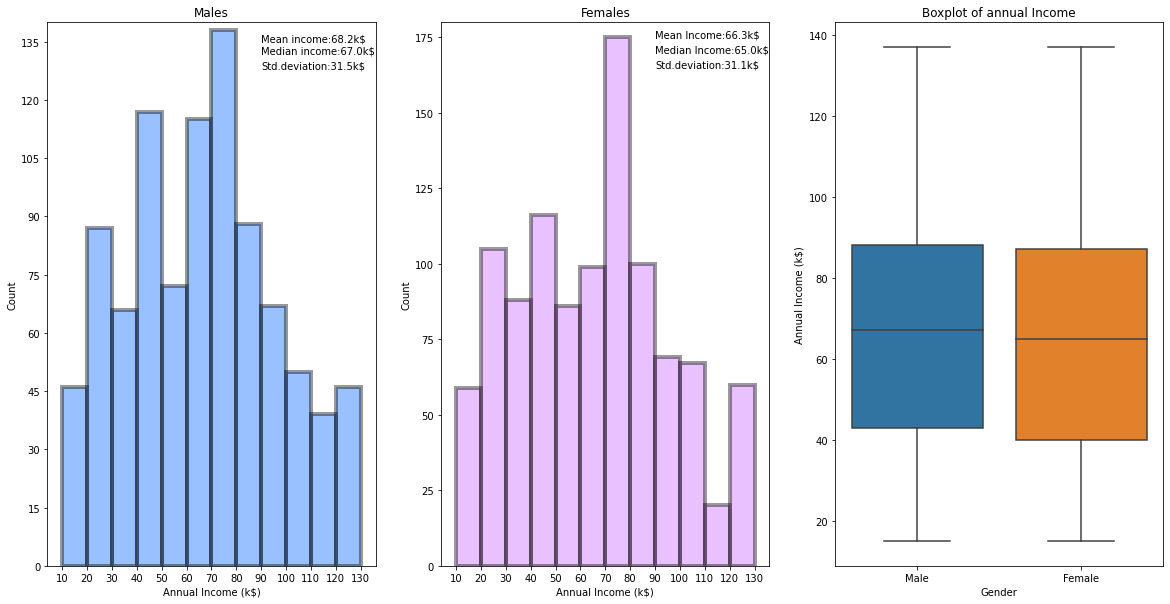

In [14]:
males_income = data[data['Gender']=='Male']['Annual Income (k$)'] #Subset with male income
females_income = data[data['Gender']=='Female']['Annual Income (k$)'] #Subset with females income

my_bins = range(10,140,10)

#Males Histogram
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=4))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,150,15))
ax1.set_ylim(0,140)
ax1.set_title('Males')
ax1.set_ylabel("Count")
ax1.text(90,135,'Mean income:{:.1f}k$'.format(males_income.mean()))
ax1.text(90,132,'Median income:{:.1f}k$'.format(males_income.median()))
ax1.text(90,128,'Std.deviation:{:.1f}k$'.format(males_income.std()))

#Females Histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=4))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,180,25))
ax2.set_ylim(0,180)
ax2.set_title('Females')
ax2.set_ylabel("Count")
ax2.text(90,175,'Mean Income:{:.1f}k$'.format(females_income.mean()))
ax2.text(90,170,'Median Income:{:.1f}k$'.format(females_income.median()))
ax2.text(90,165,'Std.deviation:{:.1f}k$'.format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, ax=ax3)
ax3.set_title('Boxplot of annual Income')
plt.show()

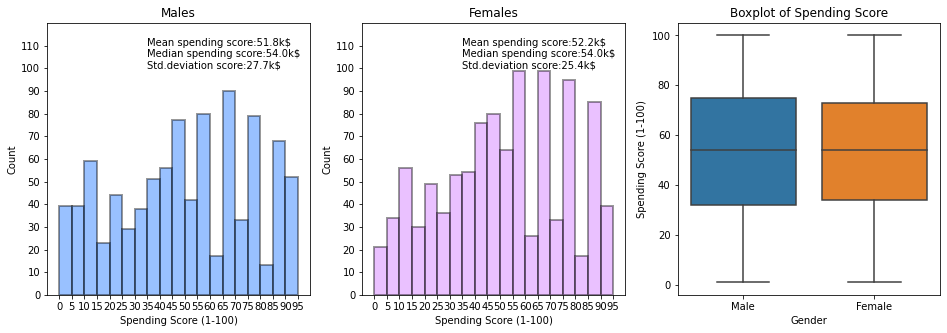

In [15]:
males_spending = data[data['Gender']=='Male']['Spending Score (1-100)'] # Subset with males age
females_spending = data[data['Gender']=='Female']['Spending Score (1-100)'] # Subset with females age

spending_bins = range(0,100,5)

#males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_yticks(range(0,120,10))
ax1.set_ylim(0,120)
ax1.set_title('Males')
ax1.set_ylabel("Count")
ax1.text(35,110,'Mean spending score:{:.1f}k$'.format(males_spending.mean()))
ax1.text(35,105,'Median spending score:{:.1f}k$'.format(males_spending.median()))
ax1.text(35,100,'Std.deviation score:{:.1f}k$'.format(males_spending.std()))

#females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_yticks(range(0,120,10))
ax2.set_ylim(0,120)
ax2.set_title('Females')
ax2.set_ylabel("Count")
ax2.text(35,110,'Mean spending score:{:.1f}k$'.format(females_spending.mean()))
ax2.text(35,105,'Median spending score:{:.1f}k$'.format(females_spending.median()))
ax2.text(35,100,'Std.deviation score:{:.1f}k$'.format(females_spending.std()))

#Boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, ax=ax3)
ax3.set_title('Boxplot of Spending Score')
plt.show()

In [16]:
medians_by_age_group = data.groupby(['Gender',pd.cut(data['Age'],age_bins)]).median()
medians_by_age_group.index =medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)

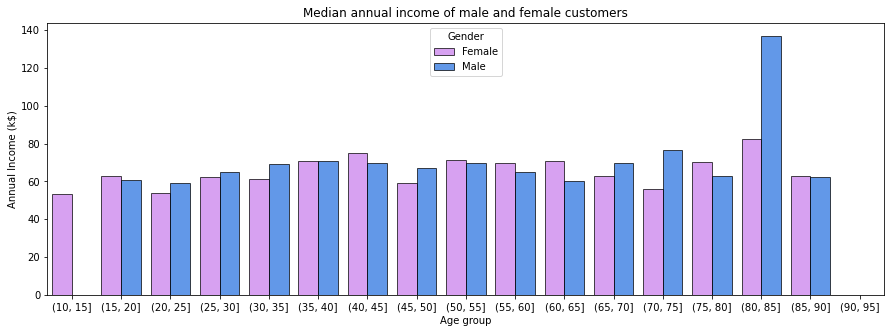

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
           palette=['#cc66ff','#0066ff'],
           alpha=0.7, edgecolor='k',
           ax=ax)

ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

# Correlations

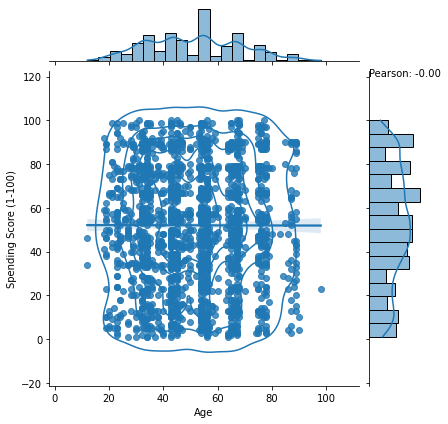

In [18]:
from scipy.stats import pearsonr

#Calculating Pearson's correlations
corr, _ = pearsonr(data['Age'], data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)',data=data,
                   kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

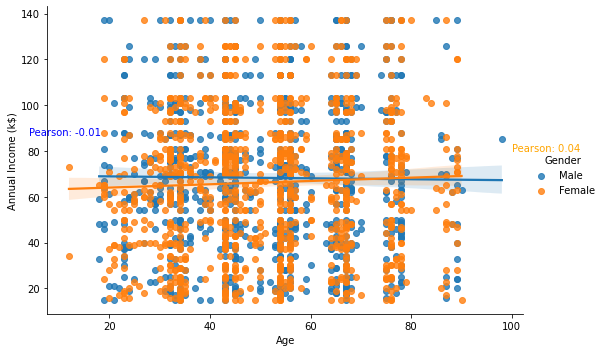

In [19]:
#Calculating Pearson's Correlation

corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age','Annual Income (k$)', data=data, hue='Gender', aspect=1.5)

plt.text(4,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(100,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

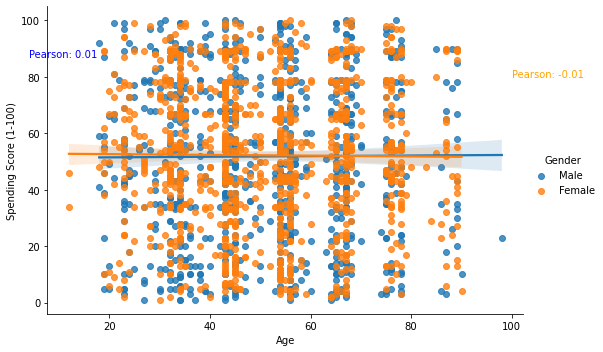

In [20]:
#Calculating Pearson's correlation
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age','Spending Score (1-100)', data=data, hue='Gender', aspect=1.5)

plt.text(4,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(100,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

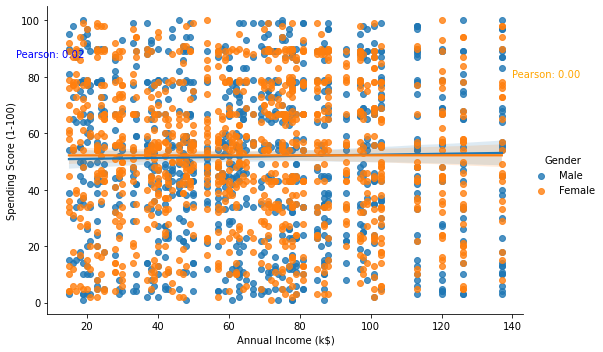

In [21]:
#Calculating Pearson's Correlation with respect income and Spending 
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)','Spending Score (1-100)', data=data, hue='Gender', aspect=1.5)

plt.text(0,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(140,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

# Clustering 
1. KMeans
2. DBSCAN
3. MeanShift
4. Agglomerative

# KMeans

In [22]:
from sklearn.cluster import KMeans

In [23]:
X_numerics = data[['Age','Annual Income (k$)','Spending Score (1-100)']] #Subset with numeric variables only

In [24]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of cluster
clusters_inertia = [] #inertia of clusters
s_scores = [] #Silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_) #data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) #data for the silhouette score method

The graph below shows the inertia for selected range of clusters.

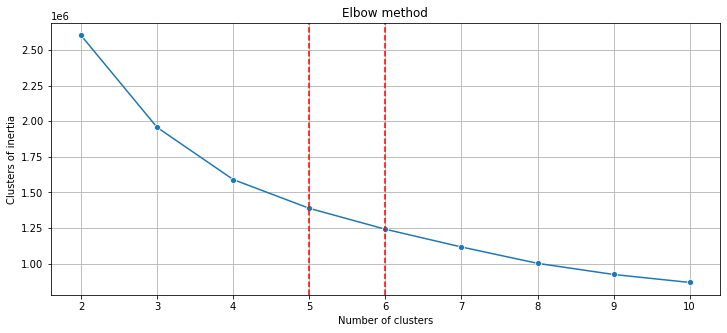

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title('Elbow method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Clusters of inertia')
ax.axvline(5, ls='--', c='red')
ax.axvline(6, ls='--', c='red')
plt.grid()
plt.show()

There is no clear 'elbow' visible. A choice of 5 or 6 clusters to be fair. Lets see the silhouette score.

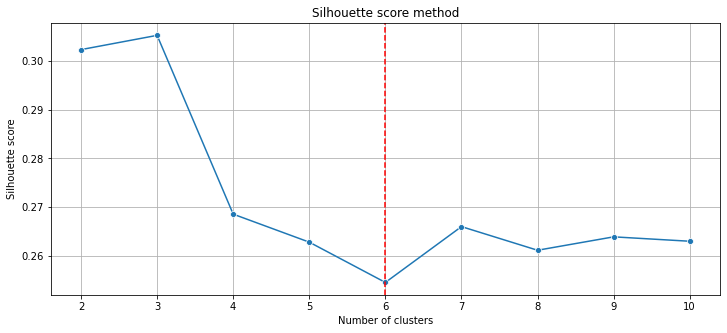

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title('Silhouette score method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.axvline(6, ls='--', c='red')
plt.grid()
plt.show()

# 5 clusters

In [27]:
X_numerics = data[['Age','Annual Income (k$)','Spending Score (1-100)']] #Subset with numeric variables only

In [28]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) #initialise anf fit k-Means model
KM5_clustered = X_numerics.copy()

In [29]:
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ #append labels to points

In [30]:
KM_5_clusters.labels_ 

array([1, 2, 1, ..., 3, 4, 3])

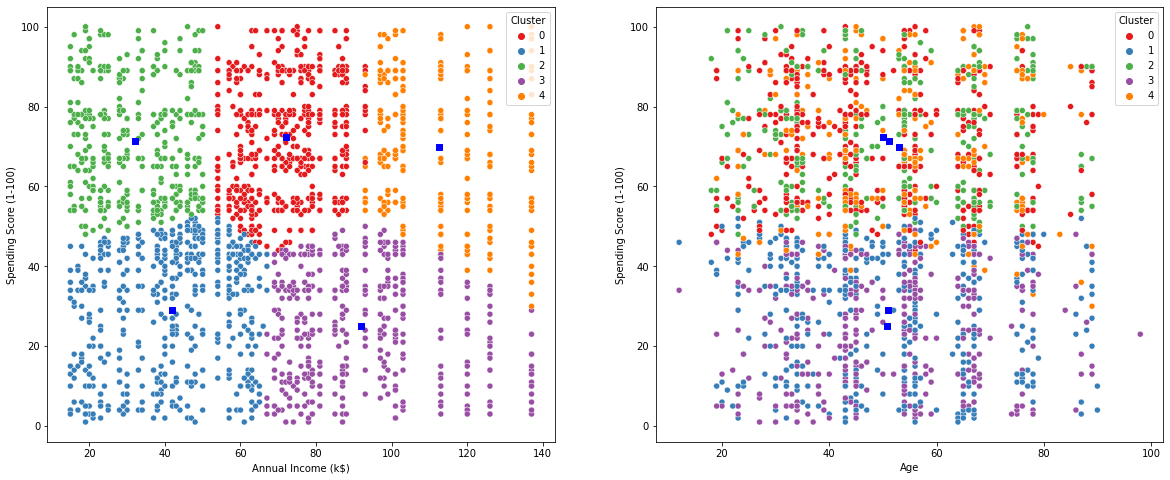

In [33]:
fig1, (axes) = plt.subplots(1,2, figsize=(20,8))

scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                        hue = 'Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
               hue = 'Cluster', palette='Set1',ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1], KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0], KM_5_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

K-Means algorithm generated the following 5 clusters:
o	Clients with low annual income and high spending score 
o	Clients with medium annual income and medium spending score 
o	Clients with high annual income and low spending score 
o	Clients with high annual income and high spending score 
o	Clients with low annual income and low spending score

There are no distinct group interms of customer age

Sizes of clusters

In [34]:
KM5_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ['KM5_size']
KM5_clust_sizes

,KM5_size
Cluster,
0,482
1,475
2,377
3,419
4,277


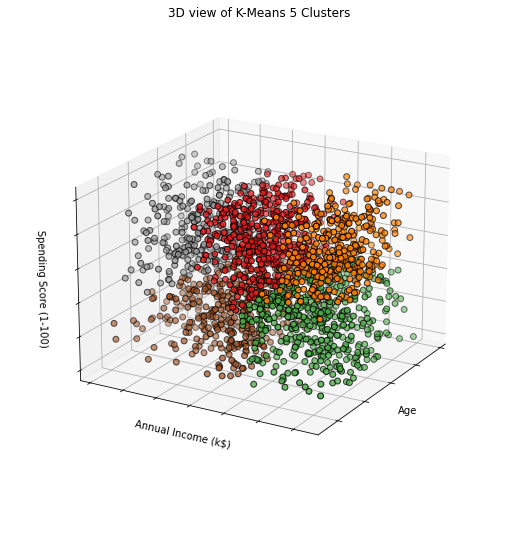

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
          KM5_clustered['Annual Income (k$)'],
          KM5_clustered['Spending Score (1-100)'],
          c=KM5_clustered['Cluster'],
          s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 Clusters')
ax.dist = 12

plt.show()

In [36]:
Cluster_df5 = pd.concat([data,pd.DataFrame({'Cluster':KM_5_clusters.labels_})],axis=1)

In [37]:
Cluster_df5

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
2025,2026,Female,40,101,2,3
2026,2027,Female,39,103,6,3
2027,2028,Male,23,103,36,3
2028,2029,Female,31,137,49,4


In [38]:
KM_5_clusters.predict([[40,101,2]])

array([3])

# 6 Clusters

In [39]:
X_numerics = data[['Age','Annual Income (k$)','Spending Score (1-100)']] #Subset with numeric variables only

In [40]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++',random_state=42).fit(X_numerics) #initialise anf fit k-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ #append labels to points

In [41]:
KM_6_clusters

KMeans(n_clusters=6, random_state=42)

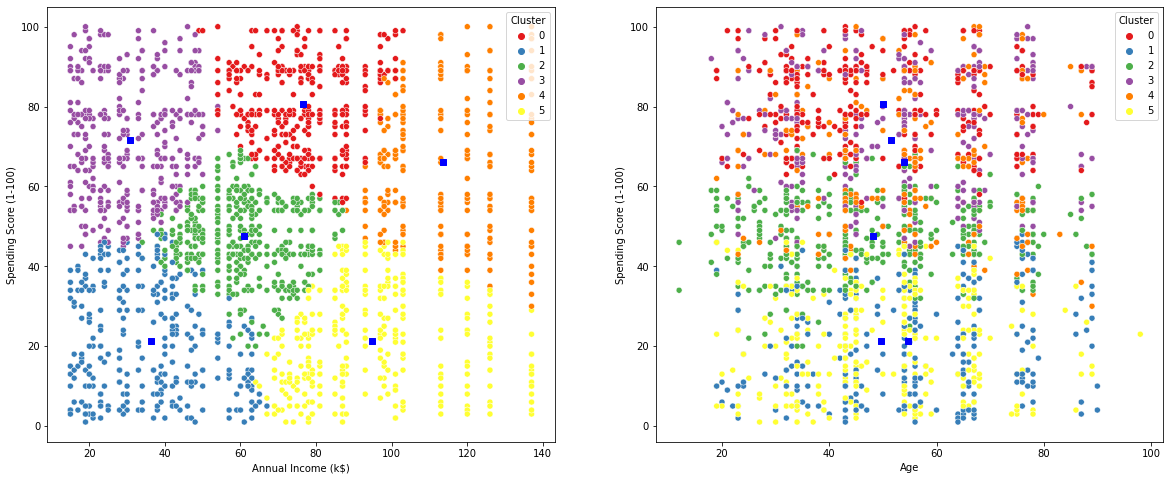

In [42]:
fig1, (axes) = plt.subplots(1,2, figsize=(20,8))

scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                        hue = 'Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
               hue = 'Cluster', palette='Set1',ax=axes[1], legend='full')

#plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2],marker='s',s=40,c='blue')
plt.show()

K-Means algorithm generated the following 6 clusters:
o Clients with low annual income and high spending score 
o Clients with medium annual income and medium spending score 
o Clients with high annual income and low spending score 
o Clients with high annual income and high spending score 
o Clients with low annual income and low spending score

Sizes of the clusters

In [43]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ['KM6_size']
KM6_clust_sizes

,KM6_size
Cluster,
0,364
1,296
2,411
3,360
4,265
5,334


In [44]:
Cluster_df6 = pd.concat([data,pd.DataFrame({'Cluster':KM_6_clusters.labels_})],axis=1)

In [45]:
Cluster_df6

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
2025,2026,Female,40,101,2,5
2026,2027,Female,39,103,6,5
2027,2028,Male,23,103,36,5
2028,2029,Female,31,137,49,4


In [46]:
KM_6_clusters.predict([[19,15,39]])

array([1])

In [47]:
cluster_0_df = Cluster_df6[Cluster_df6["Cluster"]==0]
cluster_0_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0
...,...,...,...,...,...,...
1958,1959,Female,65,88,75,0
1960,1961,Male,75,97,95,0
1972,1973,Male,25,70,90,0
1974,1975,Female,45,79,86,0


In [48]:
cluster_1_df = Cluster_df6[Cluster_df6["Cluster"]==1]
cluster_1_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
2,3,Female,20,16,6,1
4,5,Female,31,17,40,1
6,7,Female,35,18,6,1
8,9,Male,64,19,3,1
...,...,...,...,...,...,...
1979,1980,Male,56,29,24,1
1981,1982,Female,43,54,17,1
1983,1984,Male,75,50,23,1
1985,1986,Female,67,30,8,1


In [49]:
cluster_2_df = Cluster_df6[Cluster_df6["Cluster"]==2]
cluster_2_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
47,48,Female,27,40,47,2
48,49,Female,29,40,42,2
49,50,Female,31,40,42,2
50,51,Female,49,42,52,2
52,53,Female,31,43,54,2
...,...,...,...,...,...,...
1916,1917,Male,32,87,54,2
1935,1936,Male,34,40,40,2
1953,1954,Male,45,54,35,2
1973,1974,Female,67,75,32,2


In [50]:
cluster_3_df = Cluster_df6[Cluster_df6["Cluster"]==3]
cluster_3_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
...,...,...,...,...,...,...
1970,1971,Female,34,38,69,3
1980,1981,Male,45,38,68,3
1982,1983,Female,67,47,85,3
1986,1987,Male,56,20,91,3


In [51]:
cluster_4_df = Cluster_df6[Cluster_df6["Cluster"]==4]
cluster_4_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
187,188,Male,28,101,68,4
189,190,Female,36,103,85,4
191,192,Female,32,103,69,4
193,194,Female,38,113,91,4
195,196,Female,35,120,79,4
...,...,...,...,...,...,...
2017,2018,Female,56,113,48,4
2021,2022,Male,54,126,49,4
2022,2023,Female,50,126,50,4
2023,2024,Female,27,137,46,4


In [52]:
cluster_5_df = Cluster_df6[Cluster_df6["Cluster"]==5]
cluster_5_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
128,129,Male,59,71,11,5
130,131,Male,47,71,9,5
134,135,Male,20,73,5,5
136,137,Female,44,73,7,5
138,139,Male,19,74,10,5
...,...,...,...,...,...,...
2024,2025,Male,38,137,10,5
2025,2026,Female,40,101,2,5
2026,2027,Female,39,103,6,5
2027,2028,Male,23,103,36,5


In [53]:
import pickle
#Define filename for pickle file
filename = 'kmeans_model.pk2'
#Open file in write mode
with open(r'C:\Users\91889\Desktop\Streamlit\kmeans_saved_model1', 'wb') as file:
    #Save the kmeans model to the file
    pickle.dump(KM_6_clusters, file)
#Close the file
file.close()
pickle.dump(KM_6_clusters, open(r'C:\Users\91889\Desktop\Streamlit\kmeans_model.pk2', 'wb'))

In [54]:
Cluster_df6.to_csv("Clustered_Data.csv")

# DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(1,6) #min_sample values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [57]:
DBSCAN_params

[(8.0, 1),
 (8.0, 2),
 (8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.25, 1),
 (8.25, 2),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.5, 1),
 (8.5, 2),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.75, 1),
 (8.75, 2),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (9.0, 1),
 (9.0, 2),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.25, 1),
 (9.25, 2),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.5, 1),
 (9.5, 2),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.75, 1),
 (9.75, 2),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (10.0, 1),
 (10.0, 2),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.25, 1),
 (10.25, 2),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.5, 1),
 (10.5, 2),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.75, 1),
 (10.75, 2),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (11.0, 1),
 (11.0, 2),
 (11.0, 3),
 (11.0, 4),
 (11.0, 5),
 (11.25, 1),
 (11.25, 2),
 (11.25, 3),
 (11.25, 4),
 (11.25, 5),
 (11.5, 1),
 (11.5, 2),
 (11.5, 3),
 (11.5, 4),
 (11.5, 5),
 (11.75, 1),
 (11.75, 2),
 (11.75, 3),
 (11.75, 4),
 (11.75, 5),
 (12.0, 1),
 (12.0, 2),
 (12.0, 3),
 (12

Collecting number of generated clusters

In [58]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [59]:
DBS_clustering

DBSCAN(eps=12.5)

A heatplot below shows how many clusters were generated by the algorithm for the respective parameters combination

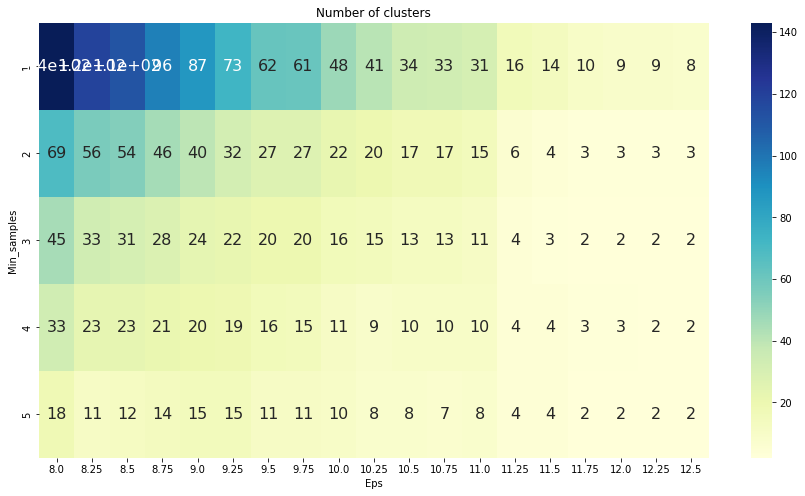

In [60]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns = ['Eps','Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size":16}, cmap='YlGnBu', ax=ax)
ax.set_title('Number of clusters')
plt.show()

Finding Silhouette Score with respect to Eps and Min_sample

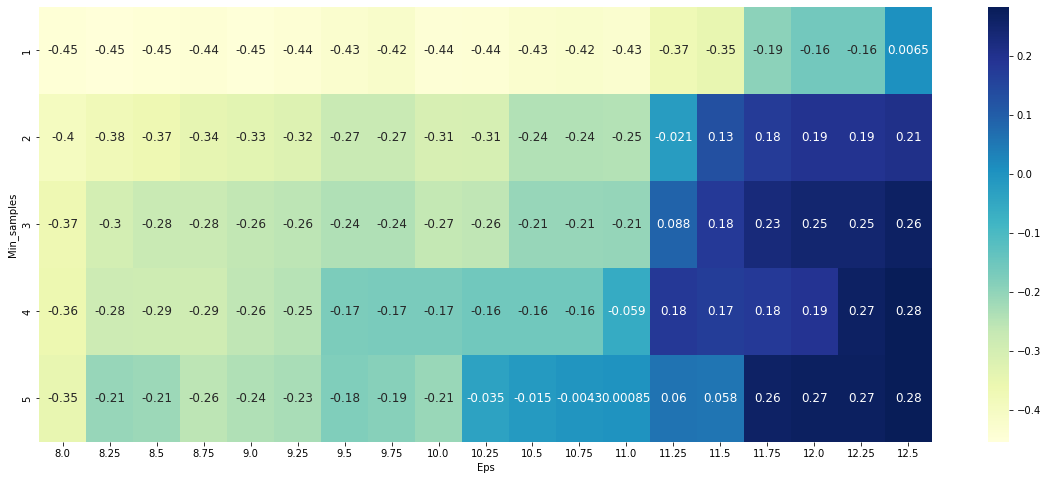

In [61]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps','Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples',columns='Eps')

fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':12}, cmap='YlGnBu', ax=ax)
plt.show()

Global maximum is 0.28 for eps=12.5 and min_samples=5

In [62]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=5).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering.labels_ #append Labels to points

Clusters sizes

In [63]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes

,DBSCAN_size
cluster,
-1,10
0,2020


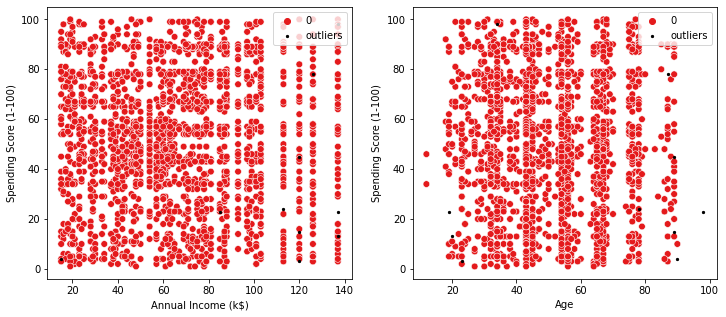

In [64]:
outliers = DBSCAN_clustered[DBSCAN_clustered['cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
               data=DBSCAN_clustered[DBSCAN_clustered['cluster']!=-1],
               hue='cluster',ax=axes[0],palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
               data=DBSCAN_clustered[DBSCAN_clustered['cluster']!=-1],
               hue='cluster', ax=axes[1], palette='Set1', legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'],outliers['Spending Score (1-100)'], s=5, label='outliers', c='k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(),fontsize='10')
plt.setp(axes[1].get_legend().get_texts(),fontsize='10')

plt.show()

# MeanShift

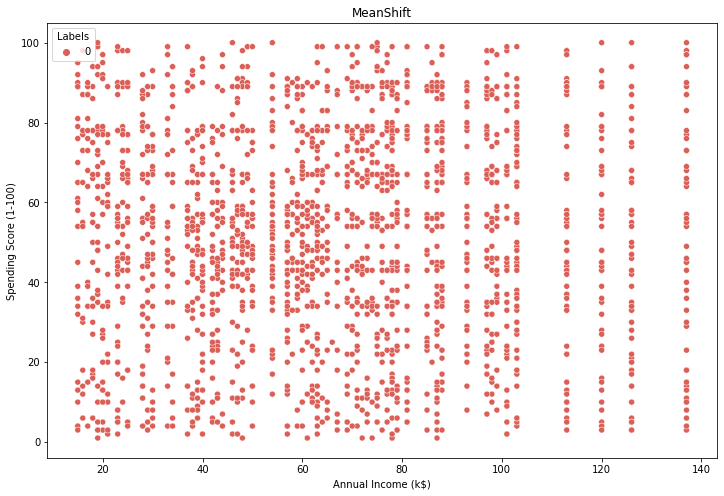

In [65]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_numerics, quantile=0.1)
ms=MeanShift(bandwidth=bandwidth).fit(X_numerics)

X_numerics['Labels'] = ms.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X_numerics['Annual Income (k$)'], X_numerics['Spending Score (1-100)'], hue=X_numerics['Labels'],
               palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))

plt.plot()
plt.title('MeanShift')
plt.show()

In [66]:
MS_clustered=X_numerics.copy()
MS_clustered.loc[:,'Cluster']=ms.labels_

In [67]:
MS_clust_sizes=MS_clustered.groupby('Cluster').size().to_frame()
MS_clust_sizes.columns=["MS_size"]
MS_clust_sizes

,MS_size
Cluster,
0,2030


In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
agglom=AgglomerativeClustering(n_clusters=5,linkage='average').fit(X_numerics)

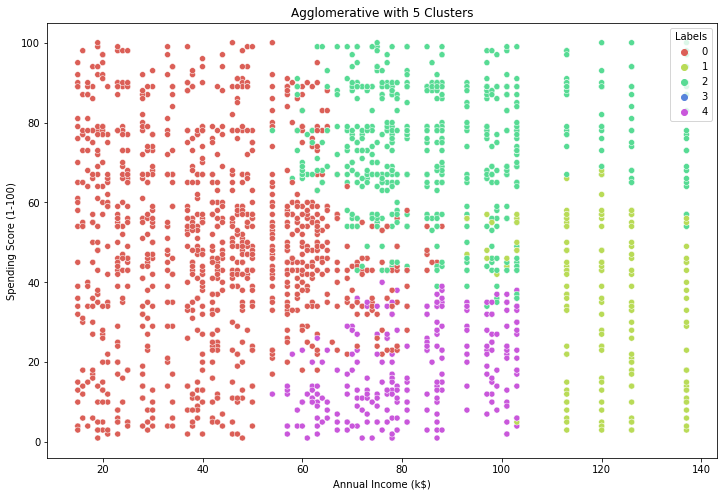

In [70]:
X_numerics['Labels']=agglom.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X_numerics['Annual Income (k$)'],X_numerics['Spending Score (1-100)'],hue=X_numerics['Labels'],
                palette=sns.color_palette('hls',5))
plt.title("Agglomerative with 5 Clusters")
plt.show()

In [71]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist=distance_matrix(X_numerics,X_numerics)
print(dist)

[[  0.          42.04759208  33.03028913 ...  88.16461875 123.
  115.68059474]
 [ 42.04759208   0.          75.01333215 ...  98.87871358 126.52667703
  130.00769208]
 [ 33.03028913  75.01333215   0.         ...  92.09777413 128.88754789
  112.92032589]
 ...
 [ 88.16461875  98.87871358  92.09777413 ...   0.          37.28270376
   35.93048845]
 [123.         126.52667703 128.88754789 ...  37.28270376   0.
   35.90264614]
 [115.68059474 130.00769208 112.92032589 ...  35.93048845  35.90264614
    0.        ]]


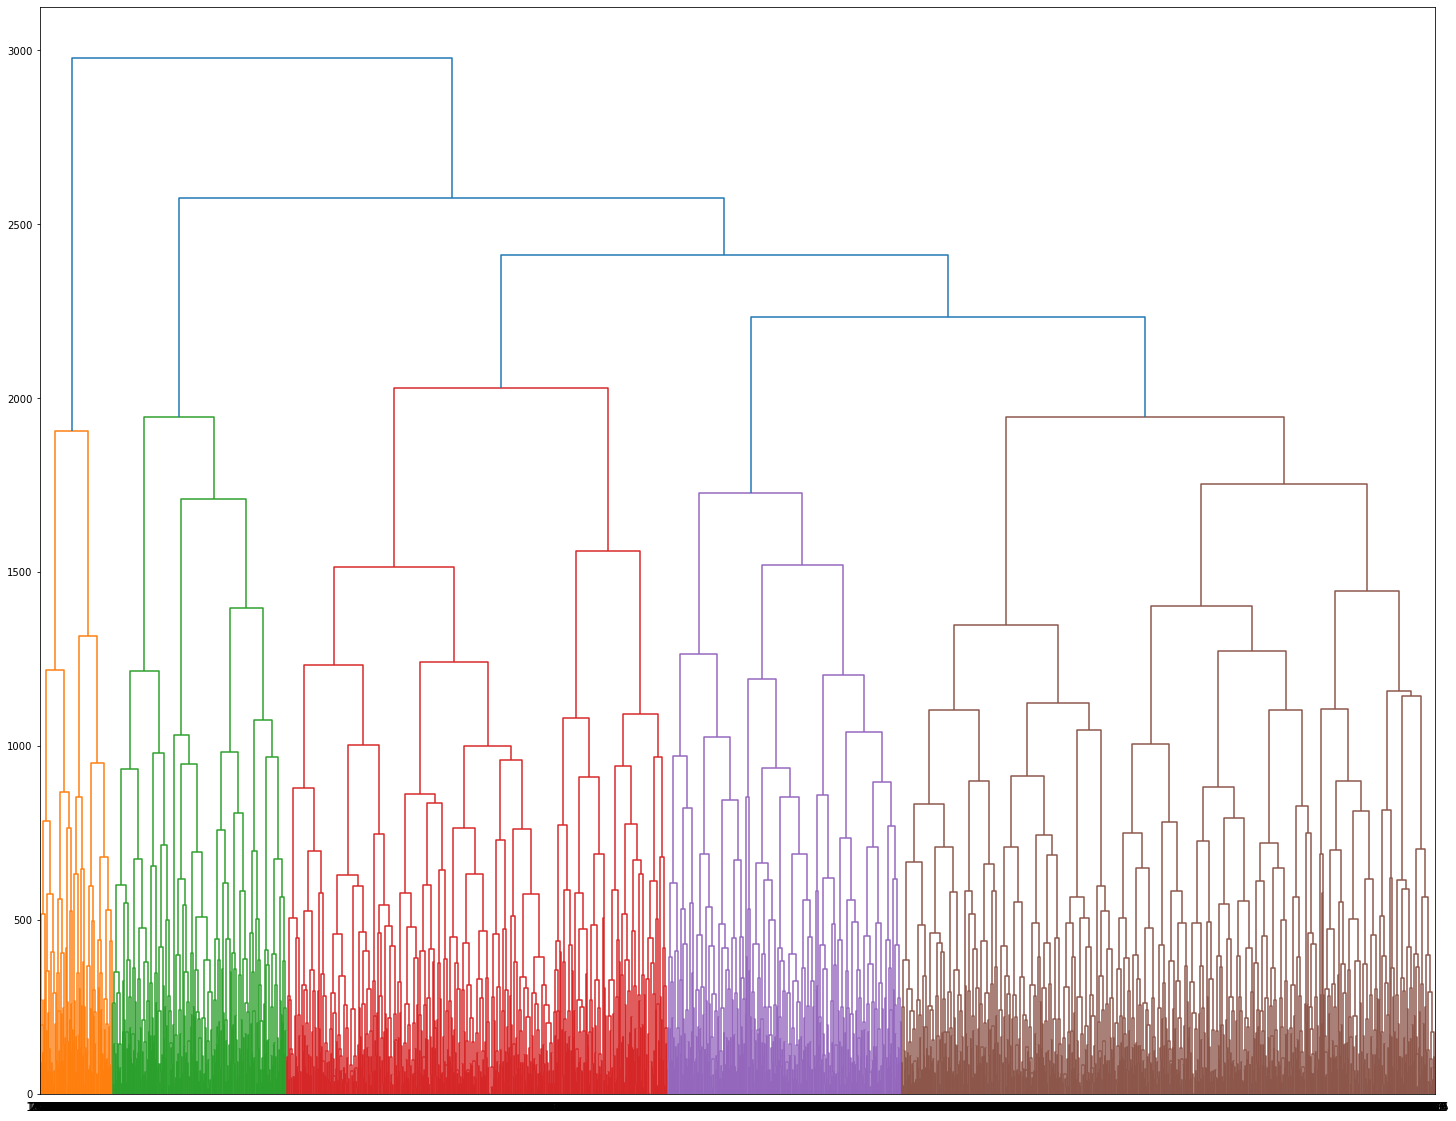

In [72]:
Z=hierarchy.linkage(dist,'complete')
plt.figure(figsize=(25,20))
dendro=hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,orientation='top')

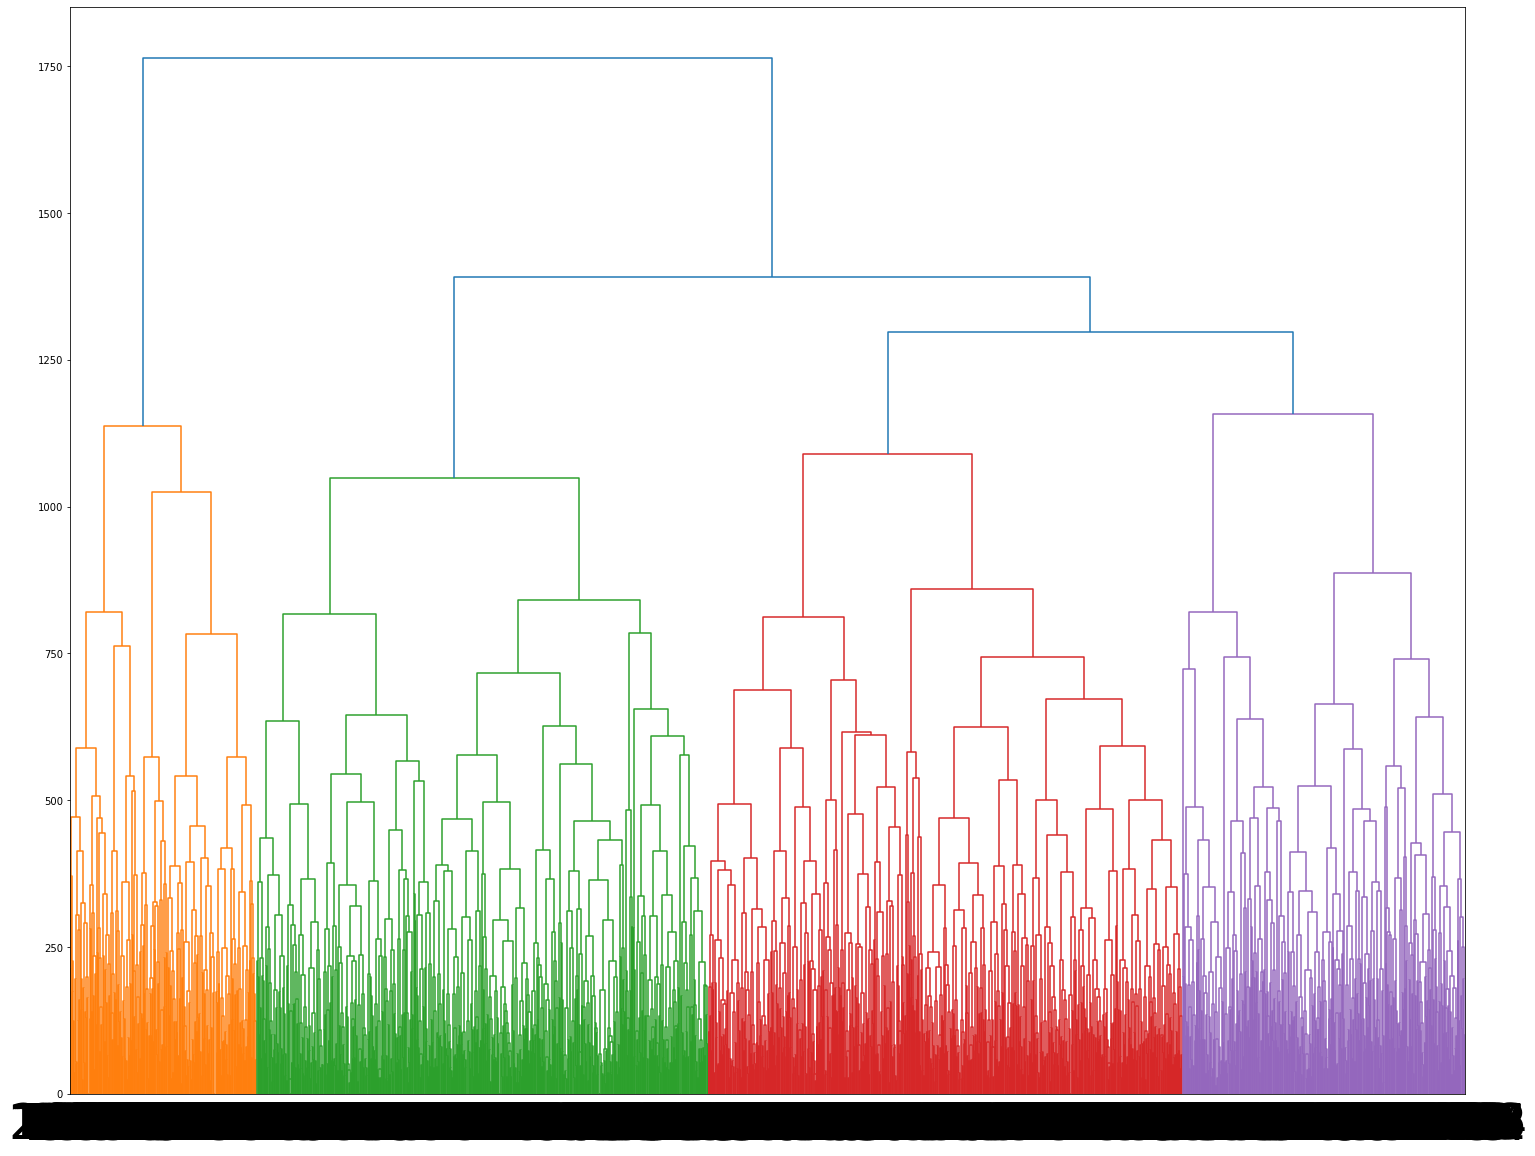

In [73]:
Z=hierarchy.linkage(dist,'average')
plt.figure(figsize=(25,20))
dendro=hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=50,orientation='top')

In [74]:
Agg_clustered=X_numerics.copy()
Agg_clustered.loc[:,'Cluster']=agglom.labels_

In [75]:
Agg_clust_sizes=Agg_clustered.groupby('Cluster').size().to_frame()
Agg_clust_sizes.columns=["Agg_size"]
Agg_clust_sizes

,Agg_size
Cluster,
0,1031
1,164
2,574
3,1
4,260


In [76]:
clusters=pd.concat([KM5_clust_sizes,KM6_clust_sizes,DBSCAN_clust_sizes,MS_clust_sizes,Agg_clust_sizes],axis=1,sort=False,copy=True)
clusters

,KM5_size,KM6_size,DBSCAN_size,MS_size,Agg_size
0,482.0,364.0,2020.0,2030.0,1031.0
1,475.0,296.0,NaN,NaN,164.0
2,377.0,411.0,NaN,NaN,574.0
3,419.0,360.0,NaN,NaN,1.0
4,277.0,265.0,NaN,NaN,260.0
5,NaN,334.0,NaN,NaN,NaN
-1,NaN,NaN,10.0,NaN,NaN
